In [73]:
import pandas as pd
from ast import literal_eval
import seaborn as sns
import pylab as plt
import numpy as np
%matplotlib inline

## PROBLEM STATEMENT:  ?

In [106]:
pd.set_option('max_colwidth',1000)

In [107]:
df = pd.read_csv('most_backed.csv')

In [108]:
print df.shape
df.head(3)

(4000, 13)


,Unnamed: 0,Unnamed: 0.1,amt.pledged,blurb,category,currency,goal,location,num.backers,num.backers.tier,pledge.tier,title,url
0,0,0,8782571.0,\nThis is a card game for people who are into kittens and explosions and laser beams and sometimes goats.\n,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,1,1,6465690.0,"\nAn unusually addicting, high-quality desk toy designed to help you focus. Fidget at work, in class, and at home in style.\n",Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, 7608, 3290, 2189, 82, 85]","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0, 129.0, 129.0, 849.0, 849.0]",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,2,2,5408916.0,\nBring Reading Rainbow’s library of interactive books & video field trips to more platforms & provide free access to classrooms in need!\n,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, 4359, 749, 1248, 500, 339, 282, 417, 1548, 517, 749, 155, 160, 60, 5, 10, 3, 100, 75, 12, 295, 69, 156, 1, 33, 1, 1, 8, 6, 30, 13, 39, 1, 4, 6, 21, 9, 3, 23, 11, 12, 20, 14, 11, 4, 14, 36, 10, 1, 1, 10, 2, 2, 8, 13, 10, 1, 1]","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100.0, 110.0, 125.0, 140.0, 145.0, 150.0, 175.0, 200.0, 200.0, 250.0, 250.0, 275.0, 300.0, 300.0, 300.0, 300.0, 350.0, 350.0, 350.0, 375.0, 375.0, 400.0, 400.0, 400.0, 450.0, 500.0, 500.0, 500.0, 600.0, 700.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 900.0, 1200.0, 1500.0, 1700.0, 2500.0, 2600.0, 3000.0, 3500.0, 3500.0, 3500.0, 3750.0, 5000.0, 10000.0, 10000.0, 10000.0]","Bring Reading Rainbow Back for Every Child, Everywhere!",/projects/readingrainbow/bring-reading-rainbow-back-for-every-child-everywh


In [109]:
df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'amt.pledged', u'blurb', u'category',
       u'currency', u'goal', u'location', u'num.backers', u'num.backers.tier',
       u'pledge.tier', u'title', u'url'],
      dtype='object')

## FEATURE ENGINEERING (Done in pledgerbackerdf, we can merge on index later)

In [229]:
pledgerbackerdf = pd.DataFrame()

## CALCULATE # OF TIERS
pledgerbackerdf['tier_count'] = df['pledge.tier'].apply(lambda x: len(x.split(',')))

## BIN COUNT of TIERS BY $ AMOUNT
def bin_tiers(x,low_amt,high_amt):
    lst = x.replace('[','').replace(']','').split(',')
    lst = [i.strip() for i in lst]
    list_int = [float(i) for i in lst if i != "..."]
    binned_list = [x for x in list_int if x >= low_amt and x <= high_amt] 
    return len(binned_list)

pledgerbackerdf['count_0-50'] = df['pledge.tier'].apply(lambda x:bin_tiers(x,0,50))
pledgerbackerdf['count_51-250'] = df['pledge.tier'].apply(lambda x:bin_tiers(x,51,250))
pledgerbackerdf['count_251-500'] = df['pledge.tier'].apply(lambda x:bin_tiers(x,251,500))
pledgerbackerdf['count_501-750'] = df['pledge.tier'].apply(lambda x:bin_tiers(x,501,750))              
pledgerbackerdf['count_751-1000'] = df['pledge.tier'].apply(lambda x:bin_tiers(x,751,1000))              
pledgerbackerdf['count_1001-10000'] = df['pledge.tier'].apply(lambda x:bin_tiers(x,1000,10000))              

## OPER-ATE ON TIERS
# valid operators are: min, max, mean, median
def oper_of_array(x,oper):
    lst = x.replace('[','').replace(']','').split(',')
    lst = [i.strip() for i in lst]
    list_int = [float(i) for i in lst if i != "..."]
    if oper == 'min':
        list_result = min(list_int)
    elif oper == 'max': 
        list_result = max(list_int)
    elif oper == 'mean': 
        list_result = round(np.mean(list_int),2)
    elif oper == 'median': 
        list_result = np.median(list_int)
    return list_result

## MIN TIER AMOUNT
pledgerbackerdf['min_tier_amount'] = df['pledge.tier'].apply(lambda x: oper_of_array(x,'min'))

## MAX TIER AMOUNT
pledgerbackerdf['max_tier_amount'] = df['pledge.tier'].apply(lambda x: oper_of_array(x,'max'))

## AVG AMOUNT/TIERS
pledgerbackerdf['avg.tier.amount'] = df['pledge.tier'].apply(lambda x: oper_of_array(x,'mean'))

## MEDIAN AMOUNT/TIERS
pledgerbackerdf['median.tier.amount'] = df['pledge.tier'].apply(lambda x: oper_of_array(x,'median'))

## AVG OF BACKERS/TIERS
pledgerbackerdf['avg.num.backers.tier'] = df['num.backers.tier'].apply(lambda x: oper_of_array(x,'mean'))

## MEDIAN OF BACKERS/TIERS
pledgerbackerdf['median.num.backers.tier'] = df['num.backers.tier'].apply(lambda x: oper_of_array(x,'median'))


## CALCULATE PERCENTAGE OF BACKERS IN EACH TIER
def list_el_to_num(x):
    lst = x.replace('[','').replace(']','').split(',')
    lst = [i.strip() for i in lst]
    list_int = [float(i) for i in lst if i != "..."]
    list_sum = sum(list_int)
    list_percent = [round((float(x)/float(list_sum))*100,2) for x in list_int]
    return str(list_percent)

pledgerbackerdf['pledge.tier.percent'] = df['num.backers.tier'].apply(list_el_to_num)


## BIN NUM BACKERS 
#  0 is less than median 
#  1 is greater than median
median_backers = df['num.backers'].median()
pledgerbackerdf['num_backers_bin'] = df['num.backers'].map(lambda x: 0 if x < median_backers else 1)

pledgerbackerdf.head()

,tier_count,count_0-50,count_51-250,count_251-500,count_501-750,count_751-1000,count_1001-10000,min_tier_amount,max_tier_amount,avg.tier.amount,median.tier.amount,avg.num.backers.tier,median.num.backers.tier,pledge.tier.percent,num_backers_bin
0,4,2,1,1,0,0,0,20.0,500.0,163.75,67.5,54661.00,7852.5,"[7.09, 92.81, 0.09, 0.0]",1
1,12,6,4,0,0,2,0,1.0,849.0,186.42,57.0,12894.17,5449.0,"[0.51, 0.16, 27.84, 14.09, 26.97, 13.98, 7.89, 4.92, 2.13, 1.41, 0.05, 0.05]",1
2,64,6,12,17,8,7,14,5.0,10000.0,1277.34,475.0,1448.44,17.0,"[21.19, 15.47, 9.86, 2.44, 6.11, 26.44, 5.35, 4.7, 0.81, 1.35, 0.54, 0.37, 0.3, 0.45, 1.67, 0.56, 0.81, 0.17, 0.17, 0.06, 0.01, 0.01, 0.0, 0.11, 0.08, 0.01, 0.32, 0.07, 0.17, 0.0, 0.04, 0.0, 0.0, 0.01, 0.01, 0.03, 0.01, 0.04, 0.0, 0.0, 0.01, 0.02, 0.01, 0.0, 0.02, 0.01, 0.01, 0.02, 0.02, 0.01, 0.0, 0.02, 0.04, 0.01, 0.0, 0.0, 0.01, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.0]",1
3,32,5,7,6,4,3,10,1.0,10000.0,1498.31,425.0,2758.59,100.0,"[6.73, 9.54, 13.04, 26.05, 26.31, 2.11, 8.22, 0.17, 0.17, 1.67, 3.45, 0.11, 1.01, 0.1, 0.11, 0.15, 0.05, 0.11, 0.06, 0.17, 0.17, 0.06, 0.11, 0.11, 0.11, 0.02, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0]",1
4,9,2,3,1,0,1,3,15.0,10000.0,1883.89,250.0,9596.00,900.0,"[55.52, 28.53, 1.26, 13.35, 1.04, 0.17, 0.12, 0.01, 0.0]",1


## EDA

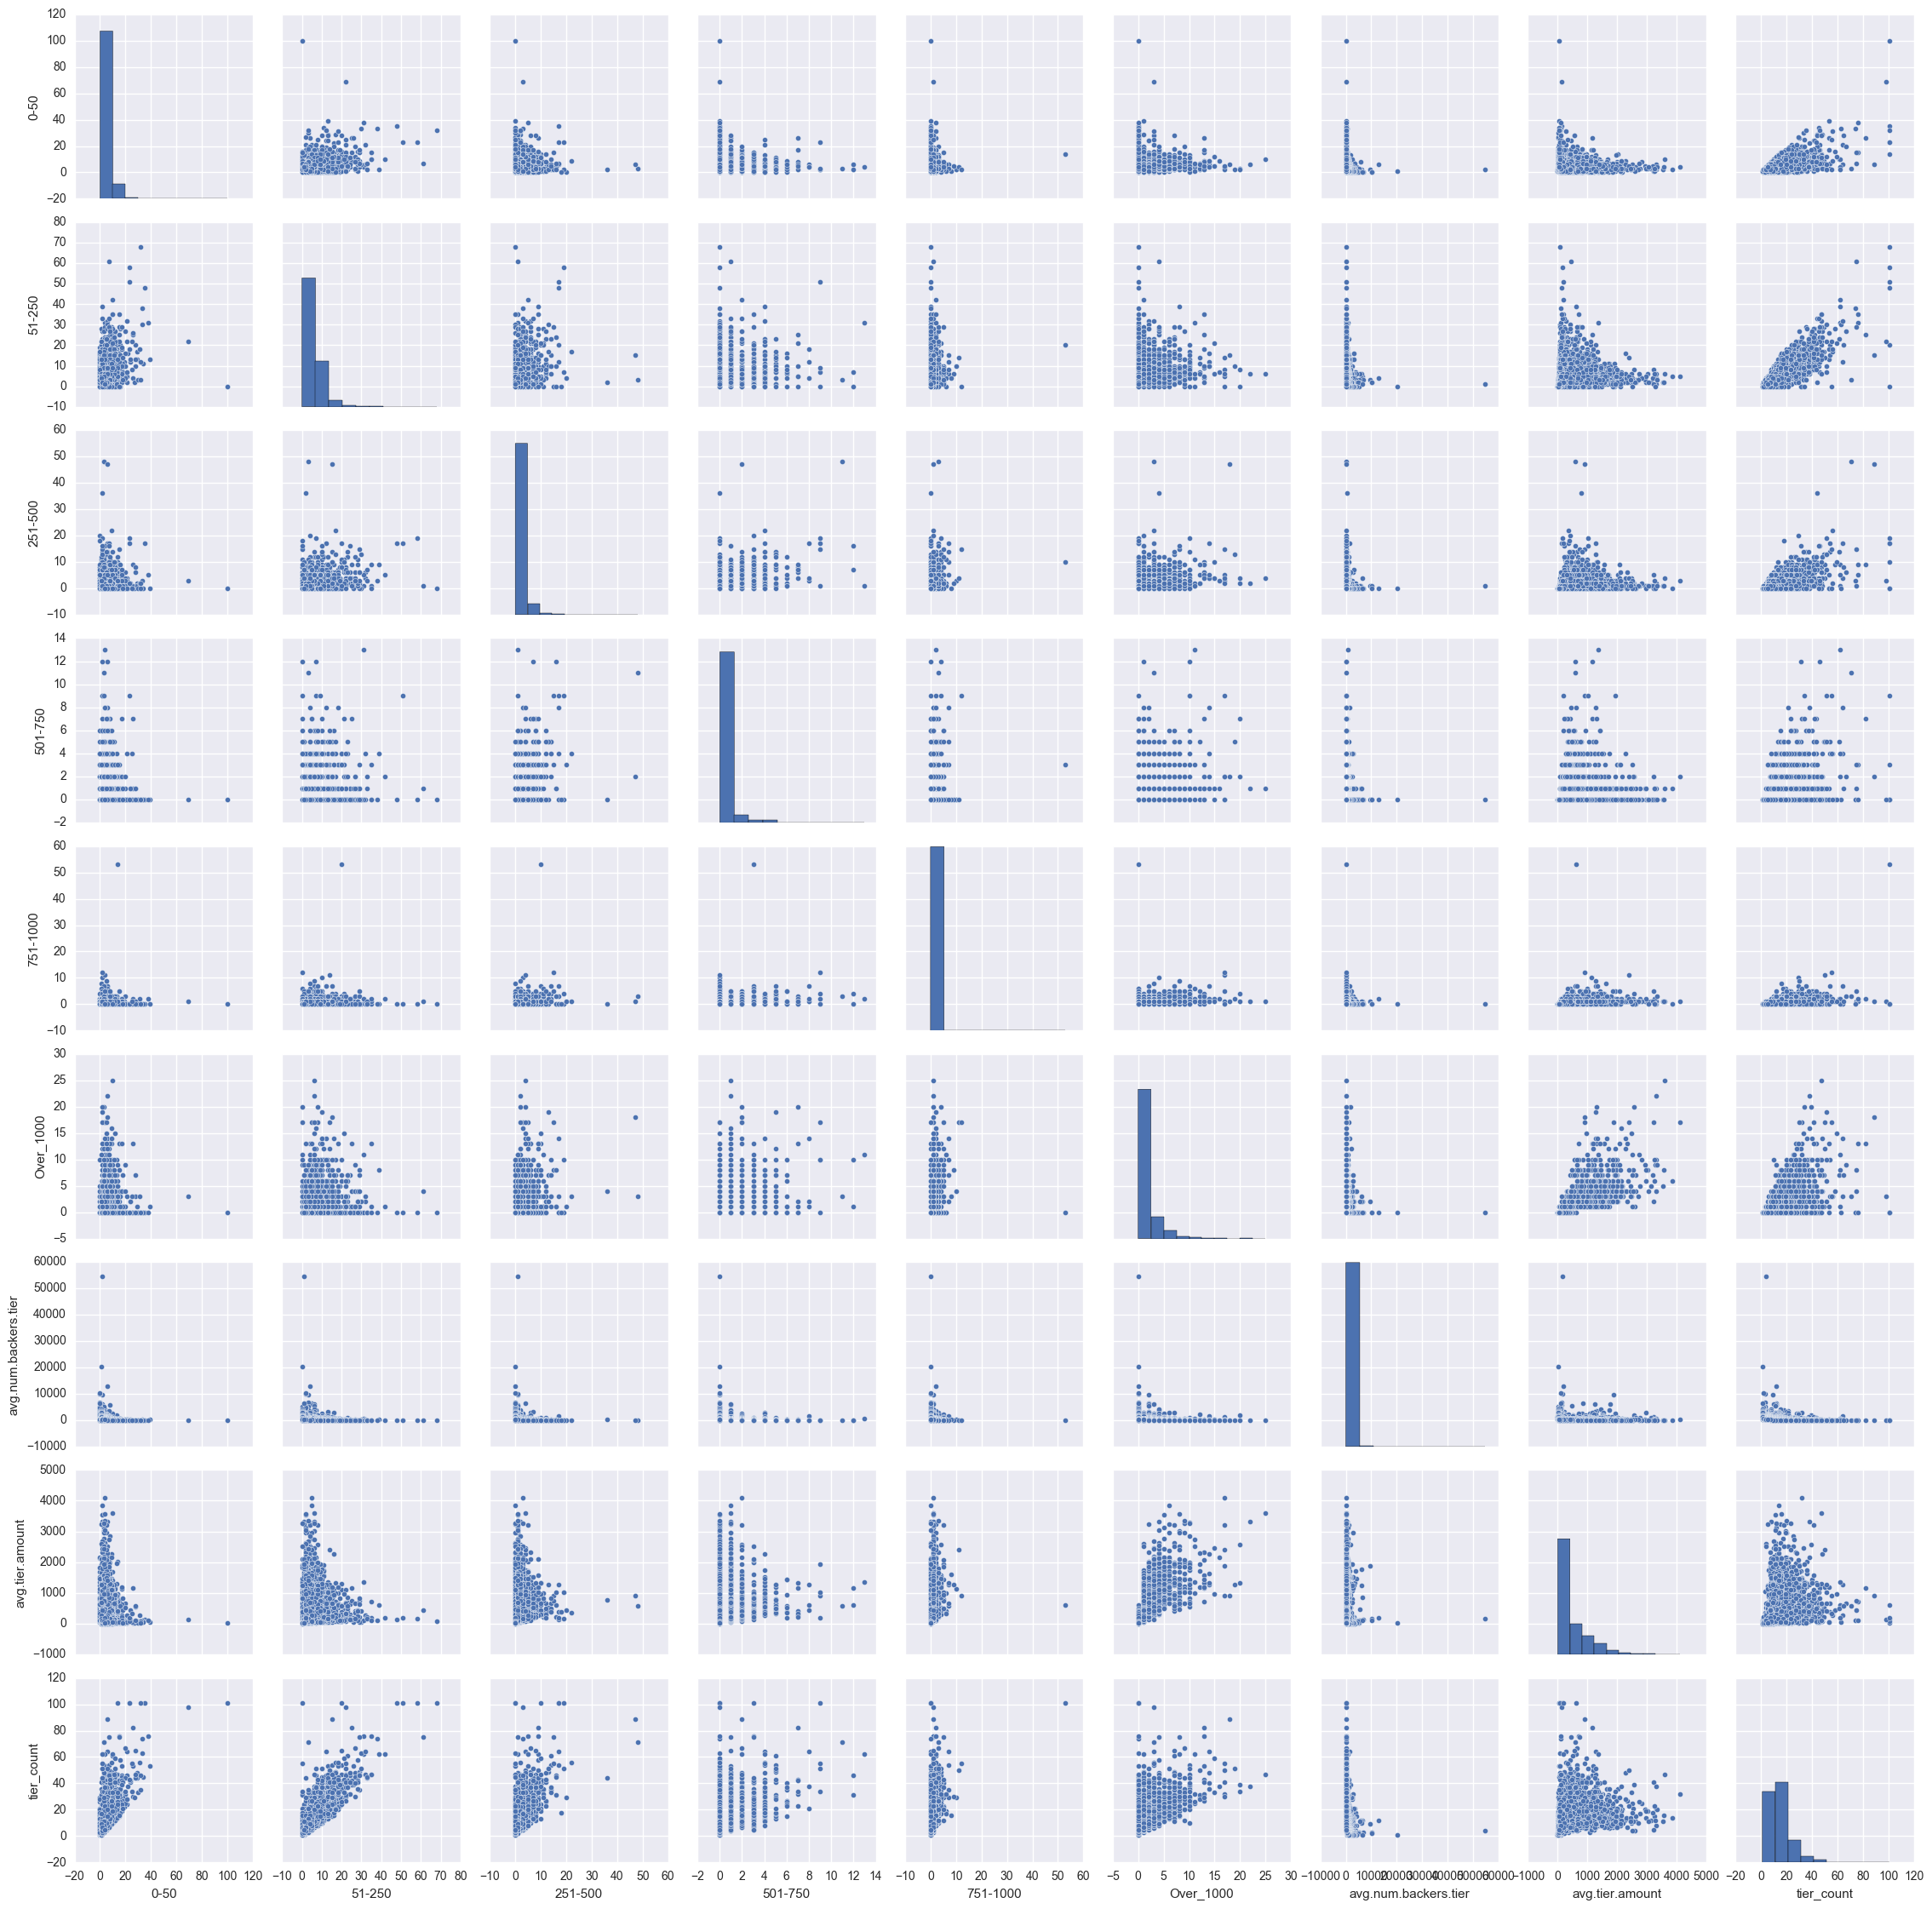

In [89]:
sns.pairplot(pledgerbackerdf);

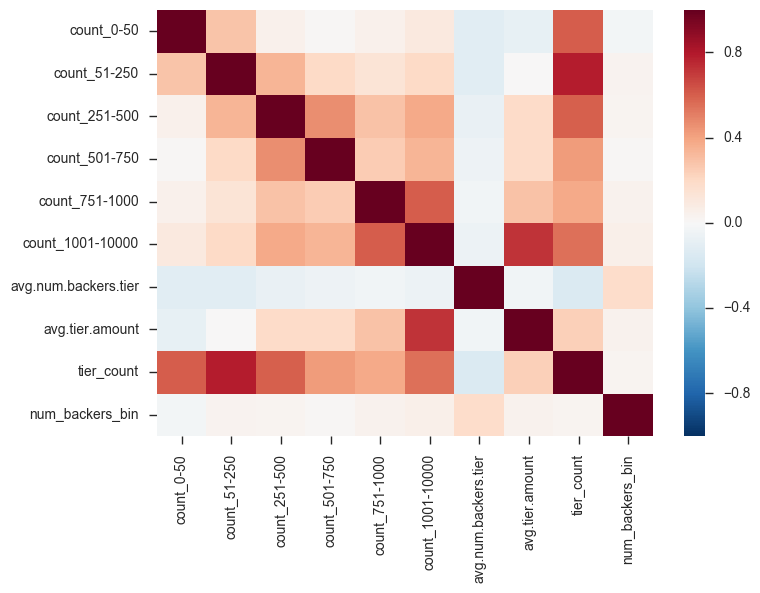

In [131]:
sns.heatmap(pledgerbackerdf.corr())

,num.backers
count,4000.000000
mean,3582.659750
std,7316.163105
min,1109.000000
25%,1406.000000
50%,1946.000000
75%,3372.000000
max,219382.000000


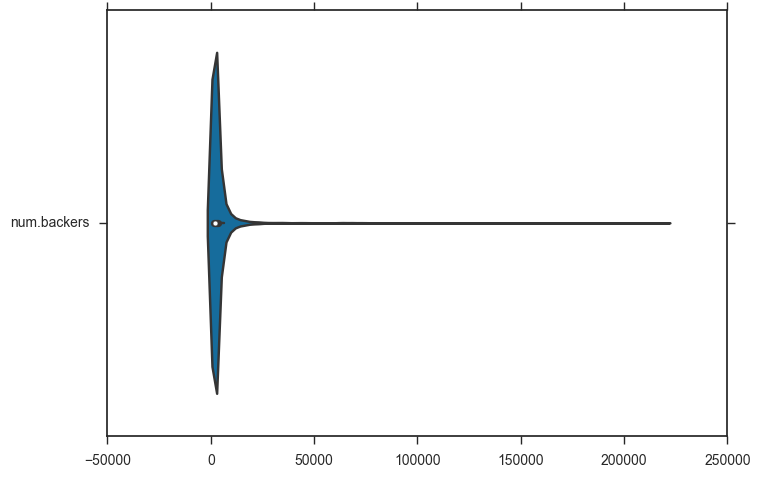

In [220]:
cols = ['num.backers']
sns.violinplot(data=df[cols], orient='h', )
df[cols].describe()

In [182]:
df[df['num.backers']>100000].shape
#print(len(df))

(3, 13)

,tier_count
count,4000.000000
mean,14.504500
std,9.955439
min,1.000000
25%,8.000000
50%,12.000000
75%,18.000000
max,101.000000


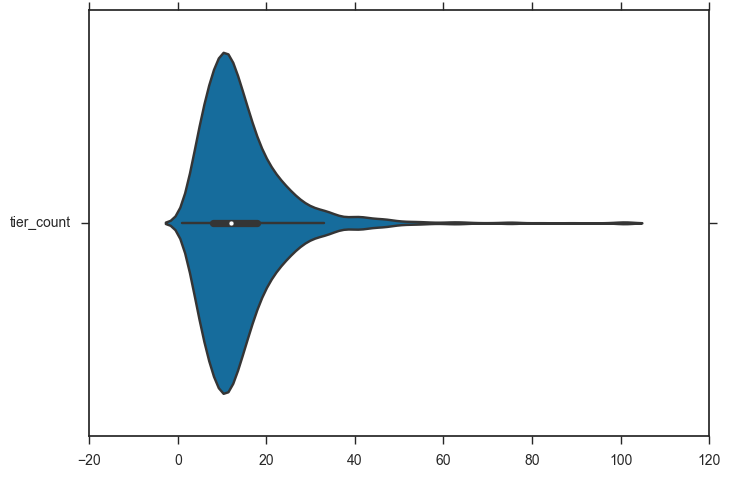

In [217]:
cols = ['tier_count']
sns.violinplot(data=pledgerbackerdf[cols], orient='h', )
pledgerbackerdf[cols].describe()

,count_0-50,count_51-250,count_251-500
count,4000.000000,4000.000000,4000.000000
mean,5.148000,5.548000,1.542000
std,4.248248,4.970198,2.407734
min,0.000000,0.000000,0.000000
25%,3.000000,3.000000,0.000000
50%,4.000000,4.000000,1.000000
75%,7.000000,7.000000,2.000000
max,100.000000,68.000000,48.000000


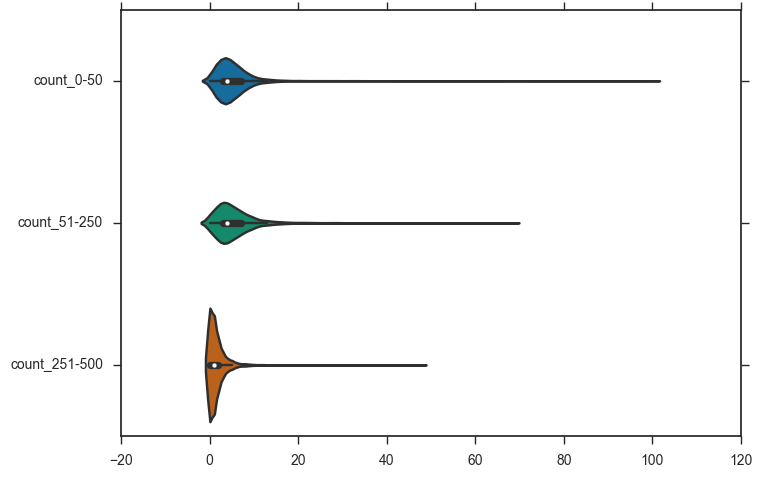

In [204]:
cols = ['count_0-50', 'count_51-250', 'count_251-500']
sns.violinplot(data=pledgerbackerdf[cols], orient='h', )
pledgerbackerdf[cols].describe()

,count_501-750,count_751-1000,count_1001-10000
count,4000.000000,4000.000000,4000.000000
mean,0.410750,0.508250,1.662000
std,0.984519,1.194901,2.651229
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000
max,13.000000,53.000000,51.000000


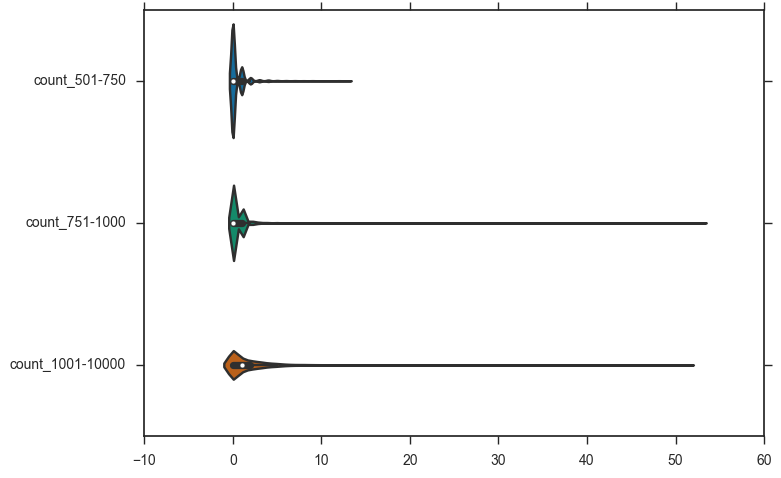

In [203]:
cols = ['count_501-750', 'count_751-1000', 'count_1001-10000']
sns.violinplot(data=pledgerbackerdf[cols], orient='h',)
pledgerbackerdf[cols].describe()

In [205]:
pledgerbackerdf.columns

Index([u'count_0-50', u'count_51-250', u'count_251-500', u'count_501-750',
       u'count_751-1000', u'count_1001-10000', u'avg.num.backers.tier',
       u'avg.tier.amount', u'min_tier_amount', u'max_tier_amount',
       u'pledge.tier.percent', u'tier_count', u'num_backers_bin'],
      dtype='object')

,avg.tier.amount
count,4000.000000
mean,470.561483
std,546.769454
min,1.000000
25%,89.500000
50%,232.212670
75%,686.643493
max,4109.531250


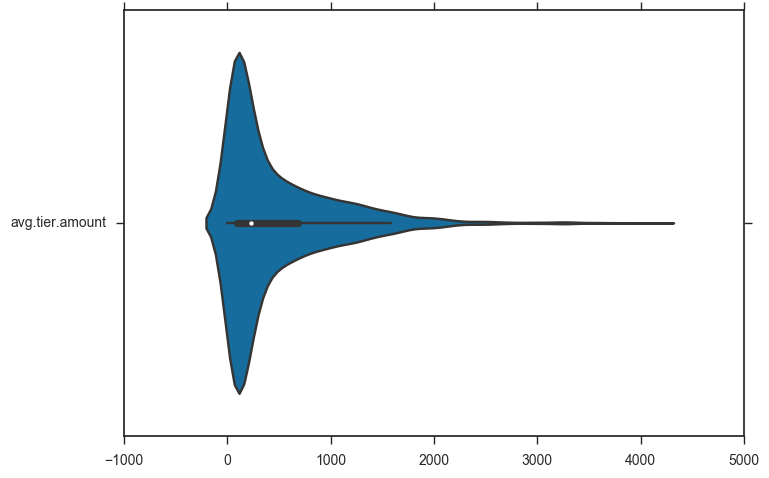

In [215]:
cols = ['avg.tier.amount', ]
sns.violinplot(pledgerbackerdf[cols], orient='h')
pledgerbackerdf[cols].describe()

,max_tier_amount
count,4000.000000
mean,3108.738420
std,3698.043015
min,1.000000
25%,250.000000
50%,1000.000000
75%,5000.000000
max,25000.000000


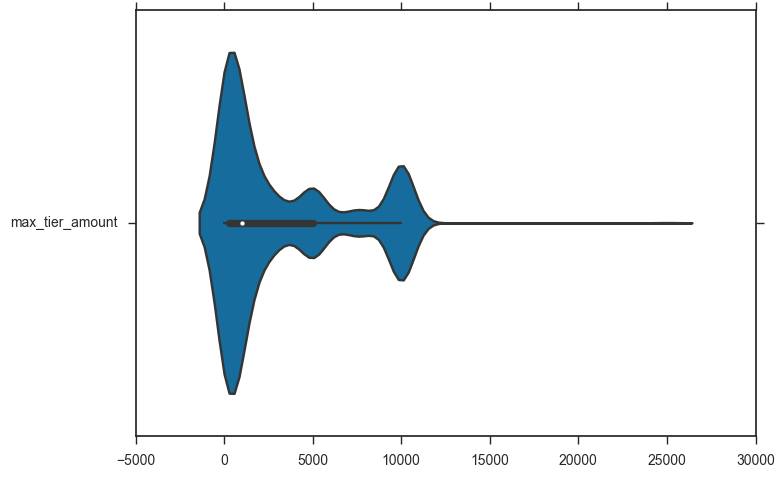

In [216]:
cols = [u'max_tier_amount',]
sns.violinplot(pledgerbackerdf[cols], orient='h')
pledgerbackerdf[cols].describe()

In [224]:
pledgerbackerdf.columns

Index([u'count_0-50', u'count_51-250', u'count_251-500', u'count_501-750',
       u'count_751-1000', u'count_1001-10000', u'min_tier_amount',
       u'max_tier_amount', u'avg.num.backers.tier', u'avg.tier.amount',
       u'median.num.backers.tier', u'median.tier.amount',
       u'pledge.tier.percent', u'tier_count', u'num_backers_bin'],
      dtype='object')

,median.tier.amount
count,4000.000000
mean,125.228545
std,150.974294
min,1.000000
25%,50.000000
50%,85.000000
75%,149.000000
max,2699.000000


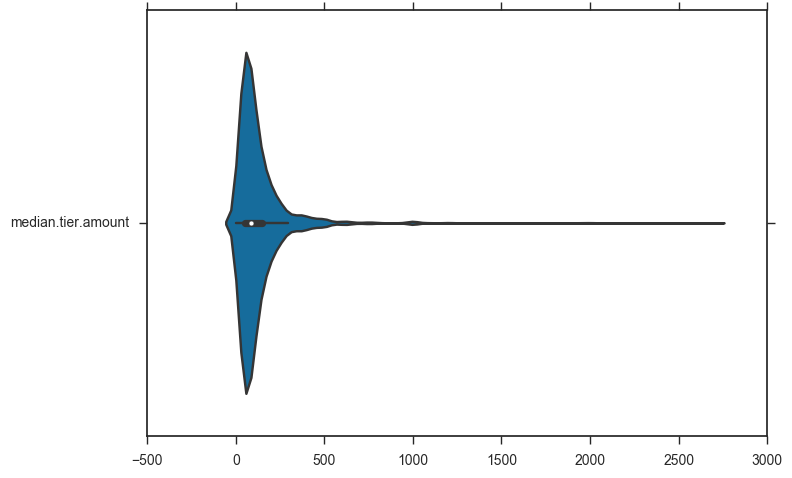

In [225]:
cols = [u'median.tier.amount',]
sns.violinplot(pledgerbackerdf[cols], orient='h')
pledgerbackerdf[cols].describe()

,median.num.backers.tier
count,4000.000000
mean,153.664500
std,519.661303
min,0.000000
25%,24.000000
50%,53.500000
75%,124.000000
max,20159.000000


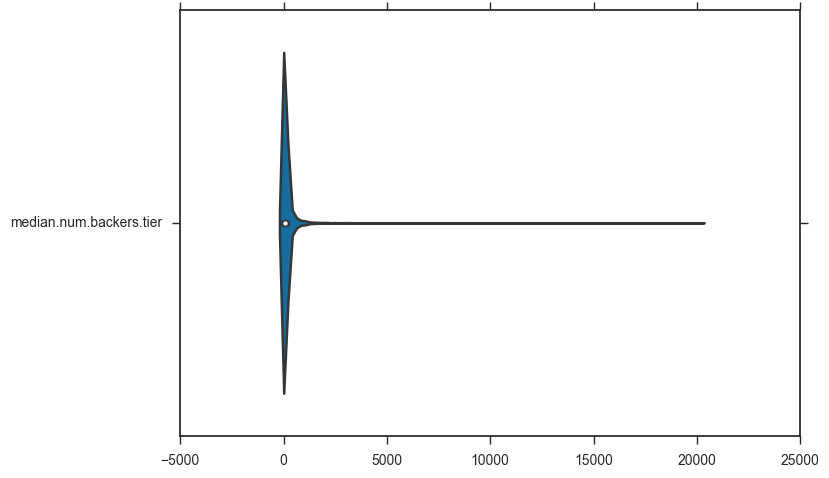

In [226]:
cols = [u'median.num.backers.tier',]
sns.violinplot(pledgerbackerdf[cols], orient='h')
pledgerbackerdf[cols].describe()